In [1]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,LeaveOneOut,ShuffleSplit,cross_val_score
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")
import numpy as np

data =pd.read_csv("iris.csv")


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<h4><i><u>1) Dans un premier temps on split le jeu de données en une partie entrainement et test.</u></i></h4>

In [2]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte= train_test_split(data.iloc[:,:-1], data.variety , test_size=0.33, random_state=42)


<h4><i><u>2) Maintenant je vais chercher le meilleur hyperparamétre k de KNeighborsClassifier</u></i></h4>

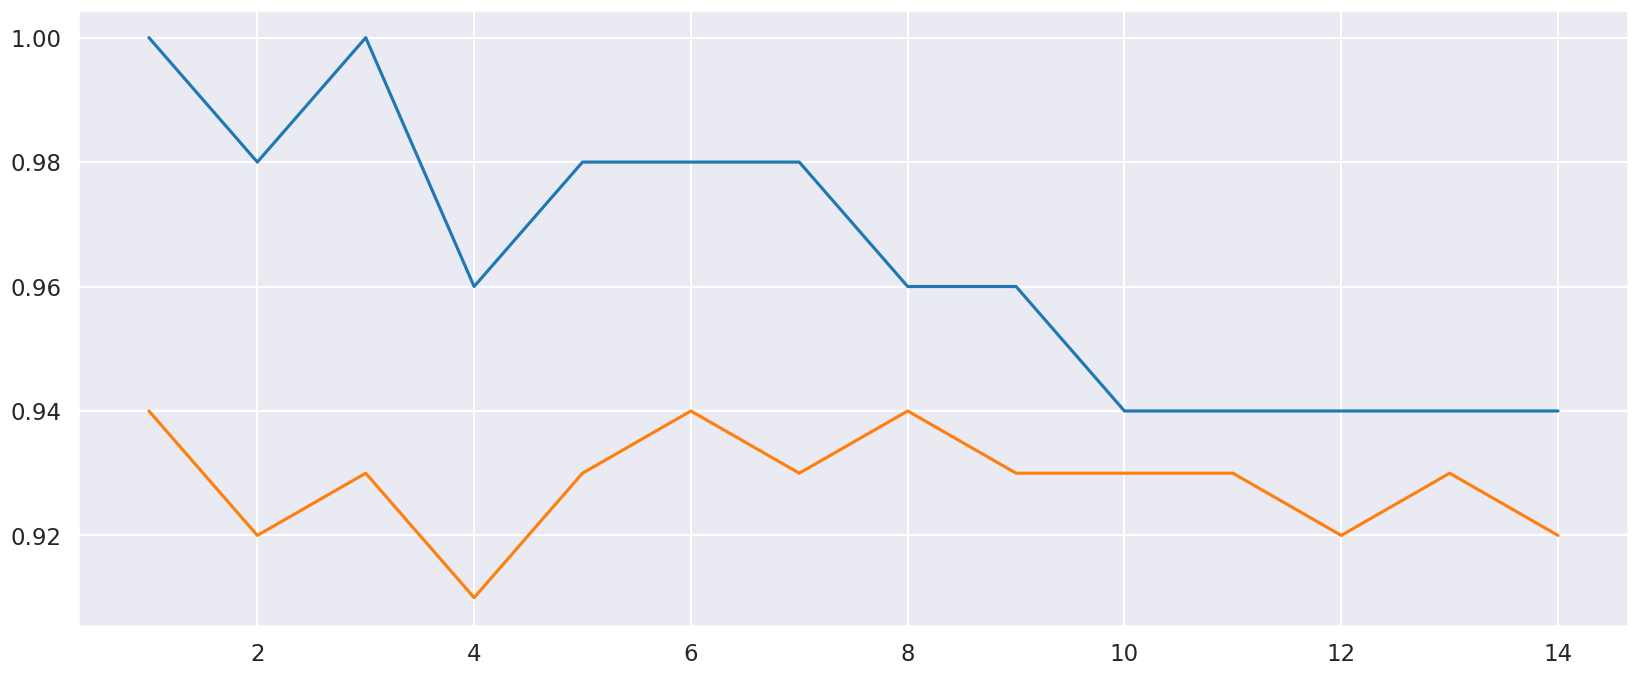

In [18]:
from sklearn.neighbors import KNeighborsClassifier
val_score,val_score_test = [],[]
graphX=[i for i in range(1,15)]
for k in range(1, 15):
    score = cross_val_score(KNeighborsClassifier(k), Xtr, ytr, cv=5).mean()
    val_score.append(score)
    score_test = cross_val_score(KNeighborsClassifier(k), Xte, yte, cv=5).mean()
    val_score_test.append(score_test)

plt.figure(figsize=(20,8))
plt.plot(graphX,val_score_test,label="Score sur le jeu de test")
plt.plot(graphX,val_score,label="Score de validation")
plt.show()

<h4>Le meilleur hyperparamètre k (nombres de voisins) est 1</h4>

<h4><i><u> 3) Essai avec 2 hyperparamètres de KNeighborsClassifier et différents model de Selection</i></u></h4>

In [20]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

model_selection ={"StatifiedKFold": StratifiedKFold(4),
                "Kfold": KFold(5, random_state=42, shuffle=True),
                "LeaveOneOut": LeaveOneOut(),
                "ShuffleSplit": ShuffleSplit(4, test_size=0.2)}
                
for v in model_selection.values():
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=v)
    grid.fit(Xtr, ytr)


    print("Le meilleur score avec ",str(v).split("(",1)[0],"est",grid.best_score_,"avec les parametres",grid.best_params_)
    

Le meilleur score avec  StratifiedKFold est 0.95 avec les parametres {'metric': 'euclidean', 'n_neighbors': 1}
Le meilleur score avec  KFold est 0.96 avec les parametres {'metric': 'euclidean', 'n_neighbors': 1}
Le meilleur score avec  LeaveOneOut est 0.96 avec les parametres {'metric': 'manhattan', 'n_neighbors': 13}
Le meilleur score avec  ShuffleSplit est 0.9875 avec les parametres {'metric': 'euclidean', 'n_neighbors': 16}


<h4>En quelques lignes de code nous avons pu effectuer un grand nombre de combinaison possible afin de determiner quel model est le plus performant.<br>
La durée de cette recherche est surtout dûe au model de selection LeaveOneOut</h4>

<h4>On enregistre le meilleur modèle :</h4>

In [10]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=ShuffleSplit(4, test_size=0.2))
grid.fit(Xtr, ytr)
model= grid.best_estimator_
model.score(Xte, yte)

0.98

<h4><i><u>4) Recherche du nombre de données necessaires pour obtenir un model performant</u></i></h4>

[ 4  9 14 20 25 31 36 42 47 52 58 63 69 74 80]


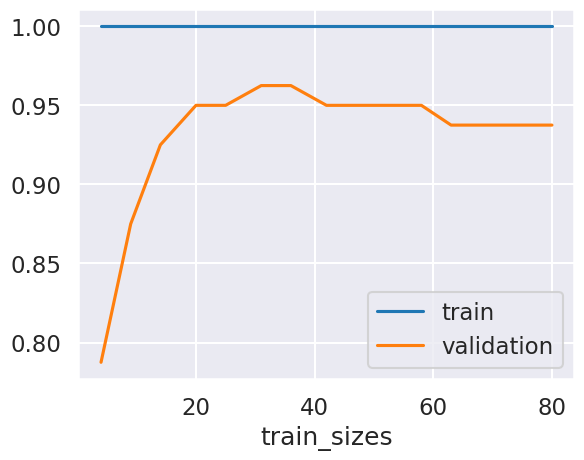

In [25]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, Xtr, ytr,train_sizes=np.linspace(0.05, 1.0, 15), cv=ShuffleSplit(4, test_size=0.2))

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

<h4>A partir d'environ 30 fleurs le modéle ne gagne plus en performence</h4>